In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import (
    datasets, metrics, model_selection as skms, linear_model, neighbors
)

In [2]:
# creating the synthetic dataset
N = 20
features = np.linspace(-10, 10, num=N)
targets = 2*features ** 2 - 3 + np.random.uniform(-2, 2, N)
(train_ftrs, train_trgt, test_ftrs, test_trgt) = skms.train_test_split(features, targets, test_size=N//2)
train_ftrs, train_trgt, test_ftrs, test_trgt

(array([ 8.94736842, -8.94736842,  0.52631579,  1.57894737, -3.68421053,
        -0.52631579, 10.        ,  4.73684211, -5.78947368,  6.84210526]),
 array([ -1.57894737,  -7.89473684,  -4.73684211,   7.89473684,
        -10.        ,   2.63157895,   5.78947368,   3.68421053,
         -2.63157895,  -6.84210526]),
 array([155.91201336, 157.2981625 ,  -0.73272273,   0.93344948,
         24.2077865 ,  -1.31261791, 196.93301144,  42.24503521,
         62.17552576,  90.61400114]),
 array([  0.28124299, 120.93187244,  42.50369679, 120.32273234,
        196.37895833,   9.49461241,  64.93657049,  24.68956372,
          9.42820224,  91.63503897]))

In [3]:
# displaying the dataframe based on the above training features and targets.
display(pd.DataFrame(
    {
        "features": train_ftrs,
        "targets": train_trgt
    }
).T)

,0,1,2,3,4,5,6,7,8,9
features,8.947368,-8.947368,0.526316,1.578947,-3.684211,-0.526316,10.000000,4.736842,-5.789474,6.842105
targets,-1.578947,-7.894737,-4.736842,7.894737,-10.000000,2.631579,5.789474,3.684211,-2.631579,-6.842105


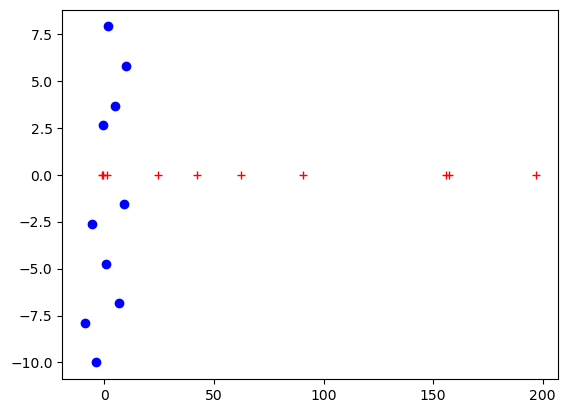

In [4]:
# plotting the dataset
plt.plot(train_ftrs, train_trgt, "bo")
plt.plot(test_ftrs, np.zeros_like(test_ftrs), "r+")
# training set is in blue dots.
# the red pluses show the input feature values for the test set.

In [6]:
skmodel = linear_model.LinearRegression()
fit = skmodel.fit(train_ftrs.reshape(-1, 1), train_trgt)
predictions = skmodel.predict(test_ftrs.reshape(-1, 1))
predictions[:3]

array([69.06852335, 69.70029403, -2.32606766])

In [7]:
# manually manipulating code complexity.

In [13]:
# using the polyfit routine from the numpy library.
# to fit-predict-evaluate a 1d polynomial. (a line)
model_oneD = np.poly1d(np.polyfit(train_ftrs, train_trgt, 1))
predictions_oneD = model_oneD(test_ftrs)
predictions_oneD[:3]

array([69.06852335, 69.70029403, -2.32606766])

In [14]:
# checking if the output from the lr model is same as that from the polyfit model.
print(f"all close? {np.allclose(predictions, predictions_oneD)}")
# calculating the RMSE of these models.
print(f"RMSE of the lr model : {np.sqrt(metrics.mean_squared_error())} ")

all close? True
